In [1]:
import pandas as pd
import numpy as np
import os

database_path = "/mnt/L-HDD/try/"

beatmaps_csv = os.path.join(database_path, "beatmaps.csv")
formatted_csv = os.path.join(database_path, "hit-object_formatted.csv")

beatmaps_df = pd.read_csv(beatmaps_csv, parse_dates=["ranked_date"])
formatted_df = pd.read_csv(formatted_csv)

In [2]:
example_map = formatted_df[formatted_df["ID"] == "1509063-0"]
audio_file_path = "/mnt/L-HDD/post_2010_dataset/audio/1509063/audio.mp3"

In [3]:
import librosa
y, sr = librosa.load(audio_file_path)

In [4]:
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

onset_frames = librosa.onset.onset_detect(y=y, sr=sr)
onset_times = librosa.frames_to_time(onset_frames, sr=sr)

print(f"Tempo: {tempo}")
print(f"Beat times: {beat_times[:10]}")
print(f"Onset times: {onset_times[:10]}")

Tempo: [172.265625]
Beat times: [2.92571429 3.27401361 3.64553288 3.9938322  4.34213152 4.69043084
 5.0155102  5.36380952 5.71210884 6.06040816]
Onset times: [2.90249433 3.25079365 3.43655329 3.62231293 3.80807256 3.9938322
 4.15637188 4.31891156 4.66721088 4.85297052]


In [5]:
example_map["Time_sec"] = example_map["Time"] / 1000
example_map

/tmp/ipykernel_3291/4092295488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  example_map["Time_sec"] = example_map["Time"] / 1000


,ID,Time,Type,X,Y,HitSound,Extra,beatmap_id,beat_length,meter,slider_velocity,sample_set,volume,effects,Time_sec
0,1509063-0,3580,slider,135,26,0,B|181:10|217:45|225:69|225:69|235:91|271:132|3...,1509063,344.827586,4.0,-142.000000,1.0,60.0,0.0,3.580
1,1509063-0,4270,slider,385,75,0,P|349:124|353:174,1509063,344.827586,4.0,-108.695652,3.0,60.0,0.0,4.270
2,1509063-0,4615,circle,365,204,0,0,1509063,344.827586,4.0,-108.695652,3.0,60.0,0.0,4.615
3,1509063-0,4787,circle,365,204,0,0,1509063,344.827586,4.0,-108.695652,3.0,60.0,0.0,4.787
4,1509063-0,5132,circle,414,371,0,0,1509063,344.827586,4.0,-108.695652,3.0,60.0,0.0,5.132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,1509063-0,244270,slider,170,68,0,P|177:103|182:139,1509063,344.827586,4.0,-98.039216,3.0,90.0,1.0,244.270
599,1509063-0,244615,circle,120,188,2,0,1509063,344.827586,4.0,-98.039216,3.0,90.0,1.0,244.615
600,1509063-0,244787,slider,120,188,0,P|65:146|-9:169,1509063,344.827586,4.0,-98.039216,3.0,90.0,1.0,244.787
601,1509063-0,245649,slider,9,378,0,L|22:306,1509063,344.827586,4.0,-98.039216,3.0,90.0,1.0,245.649


In [6]:
def align_with_beats(hit_objects, beat_times):
    aligned_objects = []
    for time in example_map['Time_sec']:
        closest_beat = min(beat_times, key=lambda x: abs(x - time))
        aligned_objects.append(closest_beat)
    return aligned_objects

example_map['Aligned_Time'] = align_with_beats(example_map, beat_times)

example_map['Time_Diff'] = example_map['Aligned_Time'].diff().fillna(0)

example_map

/tmp/ipykernel_3291/2755884186.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  example_map['Aligned_Time'] = align_with_beats(example_map, beat_times)
/tmp/ipykernel_3291/2755884186.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  example_map['Time_Diff'] = example_map['Aligned_Time'].diff().fillna(0)


,ID,Time,Type,X,Y,HitSound,Extra,beatmap_id,beat_length,meter,slider_velocity,sample_set,volume,effects,Time_sec,Aligned_Time,Time_Diff
0,1509063-0,3580,slider,135,26,0,B|181:10|217:45|225:69|225:69|235:91|271:132|3...,1509063,344.827586,4.0,-142.000000,1.0,60.0,0.0,3.580,3.645533,0.000000
1,1509063-0,4270,slider,385,75,0,P|349:124|353:174,1509063,344.827586,4.0,-108.695652,3.0,60.0,0.0,4.270,4.342132,0.696599
2,1509063-0,4615,circle,365,204,0,0,1509063,344.827586,4.0,-108.695652,3.0,60.0,0.0,4.615,4.690431,0.348299
3,1509063-0,4787,circle,365,204,0,0,1509063,344.827586,4.0,-108.695652,3.0,60.0,0.0,4.787,4.690431,0.000000
4,1509063-0,5132,circle,414,371,0,0,1509063,344.827586,4.0,-108.695652,3.0,60.0,0.0,5.132,5.015510,0.325079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,1509063-0,244270,slider,170,68,0,P|177:103|182:139,1509063,344.827586,4.0,-98.039216,3.0,90.0,1.0,244.270,244.343583,0.696599
599,1509063-0,244615,circle,120,188,2,0,1509063,344.827586,4.0,-98.039216,3.0,90.0,1.0,244.615,244.691882,0.348299
600,1509063-0,244787,slider,120,188,0,P|65:146|-9:169,1509063,344.827586,4.0,-98.039216,3.0,90.0,1.0,244.787,244.691882,0.000000
601,1509063-0,245649,slider,9,378,0,L|22:306,1509063,344.827586,4.0,-98.039216,3.0,90.0,1.0,245.649,245.713560,1.021678


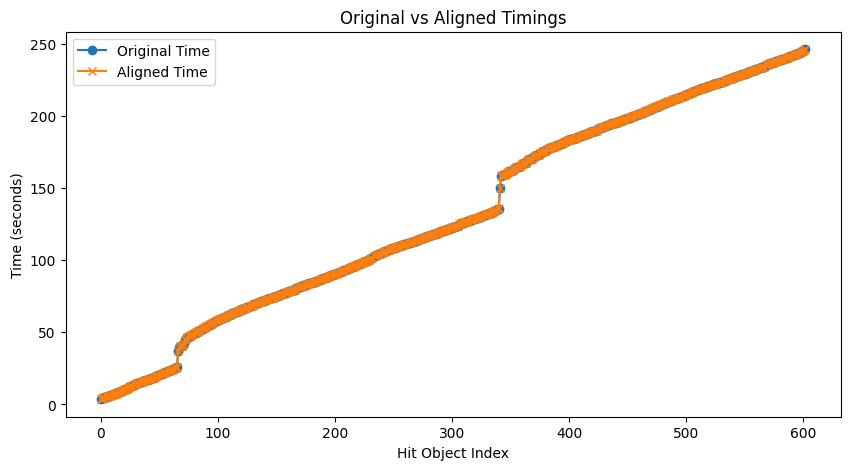

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(example_map['Time_sec'], label='Original Time', marker='o')
plt.plot(example_map['Aligned_Time'], label='Aligned Time', marker='x')
plt.xlabel('Hit Object Index')
plt.ylabel('Time (seconds)')
plt.legend()
plt.title('Original vs Aligned Timings')
plt.show()

In [14]:
tempo, beat_times = librosa.beat.beat_track(y=y, sr=sr)
onset_times = librosa.onset.onset_detect(y=y, sr=sr, units='time')
mfccs = librosa.feature.mfcc(y=y, sr=sr)
rms_energy = librosa.feature.rms(y=y)

In [19]:
def get_audio_features_at_time(time, mfccs, rms_energy, sr):
    frame = librosa.time_to_frames(time, sr=sr)
    mfcc = mfccs[:, frame]
    rms = rms_energy[0][frame]
    return (mfcc,rms)

In [20]:
example_map['MFCC'] = example_map['Time_sec'].apply(lambda x: get_audio_features_at_time(x, mfccs, rms_energy, sr)[0])
example_map['RMS'] = example_map['Time_sec'].apply(lambda x: get_audio_features_at_time(x, mfccs, rms_energy, sr)[1])

example_map.head()

/tmp/ipykernel_3291/720884850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  example_map['MFCC'] = example_map['Time_sec'].apply(lambda x: get_audio_features_at_time(x, mfccs, rms_energy, sr)[0])
/tmp/ipykernel_3291/720884850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  example_map['RMS'] = example_map['Time_sec'].apply(lambda x: get_audio_features_at_time(x, mfccs, rms_energy, sr)[1])


,ID,Time,Type,X,Y,HitSound,Extra,beatmap_id,beat_length,meter,slider_velocity,sample_set,volume,effects,Time_sec,Aligned_Time,Time_Diff,MFCC,RMS
0,1509063-0,3580,slider,135,26,0,B|181:10|217:45|225:69|225:69|235:91|271:132|3...,1509063,344.827586,4.0,-142.000000,1.0,60.0,0.0,3.580,3.645533,0.000000,"[-95.64657, 41.400257, -10.940735, 25.872135, ...",0.196154
1,1509063-0,4270,slider,385,75,0,P|349:124|353:174,1509063,344.827586,4.0,-108.695652,3.0,60.0,0.0,4.270,4.342132,0.696599,"[-50.801365, 61.354572, 1.2486651, 32.220795, ...",0.187753
2,1509063-0,4615,circle,365,204,0,0,1509063,344.827586,4.0,-108.695652,3.0,60.0,0.0,4.615,4.690431,0.348299,"[-70.5737, 65.527374, 13.982695, 23.349642, 13...",0.145844
3,1509063-0,4787,circle,365,204,0,0,1509063,344.827586,4.0,-108.695652,3.0,60.0,0.0,4.787,4.690431,0.000000,"[-87.663124, 60.158096, 15.969777, 22.76755, 1...",0.148052
4,1509063-0,5132,circle,414,371,0,0,1509063,344.827586,4.0,-108.695652,3.0,60.0,0.0,5.132,5.015510,0.325079,"[-108.05986, 63.99717, 18.59972, 29.14825, 18....",0.108285
